> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this section; a comprehensive review on the dataset will be conducted making amends and changes where and when ever needed

> Datatypes will be asssesed as well as missing values and incoherent strings or values

> Finally, feature engineering will be considered to prepare the dataset for the data analysis journey


In [1]:
#importing important libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import time
import sys

# for nice visualization
%matplotlib inline

In [2]:
sys.version

'3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]'

In [3]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 2E56-A373

 Directory of D:\python\Data Analyst\Explore a dataset

17/06/2020  09:37 PM    <DIR>          .
17/06/2020  09:37 PM    <DIR>          ..
11/06/2020  10:04 PM    <DIR>          .ipynb_checkpoints
10/06/2020  11:08 PM           846,279 Arvato_Project_Workbook.ipynb
17/06/2020  04:04 AM           403,203 Exploring a dataset.ipynb
10/06/2020  11:51 PM           586,549 Freelance.ipynb
17/06/2020  09:37 PM           409,980 investigate-a-dataset-template.ipynb
11/06/2020  03:11 PM         6,883,750 tmdb-movies.csv
               5 File(s)      9,129,761 bytes
               3 Dir(s)  126,233,542,656 bytes free


In [4]:
#loading in the dataset
movie = pd.read_csv('tmdb-movies.csv')

In [5]:
movie.shape

(10866, 21)

In [6]:
movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
movie.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


> as shown above; there are 2 types of budget and revenue columns; we will keep the ones with '_adj' suffix as these columns have been adjusted to account for inflation.

In [8]:
#dropping un-necessasary columns that offer no usable information in terms of numerical data analysis
movie.drop(columns=['id','imdb_id', 'homepage', 'overview',
                    'keywords', 'budget', 'revenue', 'tagline'],inplace=True)


In [9]:
movie.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### have noticed weird characters '|' in a few columns; a further investigation follows

In [10]:
movie['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
TV Movie|Action|Adventure|Documentary         1
Animation|Fantasy|Comedy|Science Fiction      1
Animation|Drama|Family|Fantasy                1
War|Drama|History|Action|Romance              1
Animation|Horror|Action                       1
Name: genres, Length: 2039, dtype: int64

In [11]:
movie['production_companies'].value_counts()

Paramount Pictures                                                                 156
Universal Pictures                                                                 133
Warner Bros.                                                                        84
Walt Disney Pictures                                                                76
Metro-Goldwyn-Mayer (MGM)                                                           72
                                                                                  ... 
Stan Winston Productions|Odyssey Entertainment|Isle of Man Film Commission|SWFX      1
Le Bureau|Jaibol Films                                                               1
Blood Relations Co.                                                                  1
20th Century Fox Film Corporation                                                    1
Universal Pictures|Atlas Entertainment|Classico                                      1
Name: production_companies, Length: 7445, d

In [12]:
movie['cast'].value_counts()

Louis C.K.                                                                                   6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei                      5
Bill Burr                                                                                    4
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks             3
Chris Wedge                                                                                  3
                                                                                            ..
Stephen Rea|Lotte Verbeek|Tom Charlfa|Ann Marie Horan                                        1
Angelina Jolie|Antonio Banderas|Gregory Itzin|Jack Thompson|Allison Mackie                   1
Dudley Moore|Liza Minnelli|John Gielgud|Geraldine Fitzgerald|Stephen Elliott                 1
Veronica Olivier|Beatrice Flammini|Flavia Roberto|Raniero Monaco Di Lapio|Giuseppe Maggio    1
Keira Knightley|ChloÃ« Grace Moretz|Sam Rockwell|K

### to better analyze the data, only the lead actor/actress , production company and main genre will be slected otherwise these columns would be useless to analyze since they contain multiple names in bulk

In [13]:
#casting columns 'cast' and 'production_companies' to type 'str' as to be able to iterate 
#over their values when transformed into a list caused by the .strip() function

movie['cast'] = movie['cast'].astype('str')
movie['production_companies'] = movie['production_companies'].astype('str')
movie['genres'] = movie['genres'].astype('str')

#turning each value in these columns into lists and then selecting the first element in every list

movie['cast'] = [i[0] for i in  movie['cast'].str.split('|')]
movie['production_companies'] = [i[0] for i in  movie['production_companies'].str.split('|')]
movie['genres'] = [i[0] for i in  movie['genres'].str.split('|')]

### Decided to rename newly adjusted columns to better reflect their new information
>decided on lead_talent instead of lead_actor so not to be sexist :)

In [14]:
#renaming columns

movie.rename(columns = {'cast':'lead_talent'}, inplace=True)
movie.rename(columns = {'production_companies':'lead_production_company'}, inplace=True)
movie.rename(columns = {'genres':'main_genre'}, inplace=True)


In [15]:
movie.head(2)

,popularity,original_title,lead_talent,director,runtime,main_genre,lead_production_company,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


## Feature engineering date column
#### extracting month as the full date is useless since we already have a year column in the dataset
#### and then converting months into seasons as movies are usually season based

In [16]:
movie['release_date'].value_counts()

1/1/09      28
1/1/08      21
1/1/07      18
1/1/05      16
10/10/14    15
            ..
6/21/88      1
10/21/87     1
6/21/77      1
2/24/04      1
6/27/05      1
Name: release_date, Length: 5909, dtype: int64

In [17]:
#extracting month from date column and creating a new column ''release_month'
movie['release_month'] = [i[0] for i in movie['release_date'].str.split('/')]
movie['release_month'].value_counts()

9     1331
10    1153
12     985
1      919
8      918
6      827
3      823
11     814
5      809
7      799
4      797
2      691
Name: release_month, dtype: int64

In [18]:
#dropping the now useless 'release_date' column
movie.drop(columns='release_date', inplace = True)

In [19]:
#creating a dictionary to map months with their corresponding season

seasons = {'Spring': [3,4,5],
            'Summer': [6,7,8],
            'Fall': [9,10,11],
            'Winter': [12,1,2]
            }

#creating function to check for a month value and assign it its appropiate season

def classify_season(value):
    try:
        for key, values in seasons.items():
            if value in values:
                return key
    # In case value is NaN
    except ValueError:
        return np.nan

In [20]:
#creating new column 'season'
movie['release_month'] = movie['release_month'].astype('int64')
movie['season'] = movie['release_month'].apply(classify_season)

In [21]:
#drop the now useless 'release_moth' column
movie.drop(columns='release_month', inplace = True)

### Taking it one step further and assigning years to their corresponding era

In [22]:
#creating dictionary to map years with their corresponding era
era = { '60s': np.arange(1960,1970).tolist(),
       '70s': np.arange(1970,1980).tolist(),
       '80s': np.arange(1980,1990).tolist(),
       '90s': np.arange(1990,2000).tolist(),
       '00s': np.arange(2000,2010).tolist(),
       '10s': np.arange(2010,2016).tolist()
      }

#creating function to check for year value and assign appropiate era

def classify_era(value):
    try:
        for key, values in era.items():
            if value in values:
                return key
    # In case value is NaN
    except ValueError:
        return np.nan

In [23]:
movie['era'] = movie['release_year'].apply(classify_era)

In [24]:
movie.head(3)

,popularity,original_title,lead_talent,director,runtime,main_genre,lead_production_company,vote_count,vote_average,release_year,budget_adj,revenue_adj,season,era
0,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09,Summer,10s
1,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,1.379999e+08,3.481613e+08,Spring,10s
2,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,1.012000e+08,2.716190e+08,Spring,10s


In [25]:
#checking data types for columns
movie.dtypes

popularity                 float64
original_title              object
lead_talent                 object
director                    object
runtime                      int64
main_genre                  object
lead_production_company     object
vote_count                   int64
vote_average               float64
release_year                 int64
budget_adj                 float64
revenue_adj                float64
season                      object
era                         object
dtype: object

In [26]:
#converting adjusted budget and revenue columns into int for better readibility
movie['budget_adj'] = movie['budget_adj'].astype('int64')
movie['revenue_adj'] = movie['revenue_adj'].astype('int64')

In [27]:
movie.head()

,popularity,original_title,lead_talent,director,runtime,main_genre,lead_production_company,vote_count,vote_average,release_year,budget_adj,revenue_adj,season,era
0,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,137999939,1392445892,Summer,10s
1,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,137999939,348161292,Spring,10s
2,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,101199955,271619025,Spring,10s
3,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015,183999919,1902723129,Winter,10s
4,9.335014,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2947,7.3,2015,174799923,1385748801,Spring,10s


In [28]:
#re ordering columns purely to satisfy my OCD  :) 
cols = ['original_title','main_genre', 'lead_talent', 'director','lead_production_company',
        'season','release_year','era', 'runtime', 'popularity',
         'vote_count', 'vote_average', 
        'budget_adj', 'revenue_adj']

movie = movie[cols]
movie.columns

Index(['original_title', 'main_genre', 'lead_talent', 'director',
       'lead_production_company', 'season', 'release_year', 'era', 'runtime',
       'popularity', 'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [29]:
movie.head()

,original_title,main_genre,lead_talent,director,lead_production_company,season,release_year,era,runtime,popularity,vote_count,vote_average,budget_adj,revenue_adj
0,Jurassic World,Action,Chris Pratt,Colin Trevorrow,Universal Studios,Summer,2015,10s,124,32.985763,5562,6.5,137999939,1392445892
1,Mad Max: Fury Road,Action,Tom Hardy,George Miller,Village Roadshow Pictures,Spring,2015,10s,120,28.419936,6185,7.1,137999939,348161292
2,Insurgent,Adventure,Shailene Woodley,Robert Schwentke,Summit Entertainment,Spring,2015,10s,119,13.112507,2480,6.3,101199955,271619025
3,Star Wars: The Force Awakens,Action,Harrison Ford,J.J. Abrams,Lucasfilm,Winter,2015,10s,136,11.173104,5292,7.5,183999919,1902723129
4,Furious 7,Action,Vin Diesel,James Wan,Universal Pictures,Spring,2015,10s,137,9.335014,2947,7.3,174799923,1385748801


In [30]:
#checking null values
movie.isnull().sum()

original_title              0
main_genre                  0
lead_talent                 0
director                   44
lead_production_company     0
season                      0
release_year                0
era                         0
runtime                     0
popularity                  0
vote_count                  0
vote_average                0
budget_adj                  0
revenue_adj                 0
dtype: int64

In [31]:
movie['lead_production_company'].value_counts(dropna=False)

nan                                       1030
Universal Pictures                         460
Paramount Pictures                         426
Columbia Pictures                          271
Twentieth Century Fox Film Corporation     242
                                          ... 
Seasonal Film Corporation                    1
Gare Farrand Entertainment                   1
Playboy Productions                          1
UK Film Studio                               1
Thank You, Brain! Productions                1
Name: lead_production_company, Length: 3058, dtype: int64

In [32]:
movie['lead_talent'].value_counts(dropna=False)

nan                76
Nicolas Cage       50
Robert De Niro     42
Bruce Willis       39
Clint Eastwood     38
                   ..
Michael Teigen      1
Macon Blair         1
George Hamilton     1
Sean Clement        1
Charles Dance       1
Name: lead_talent, Length: 4301, dtype: int64

In [33]:
movie['main_genre'].value_counts(dropna=False)

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
nan                  23
Foreign               9
Name: main_genre, dtype: int64

#### There seemed to be null values encoded as 'nan' and because the rest of the values are widely distrubuted; mode imputation is not a good idea Therefore will have to drop them

In [34]:
movie = movie[(movie['lead_production_company']!= 'nan') & (movie['lead_talent'] != 'nan') & (movie['main_genre']!= 'nan') ]

In [35]:
movie['lead_talent'].value_counts(dropna=False)

Nicolas Cage                50
Robert De Niro              42
Bruce Willis                39
Clint Eastwood              38
Johnny Depp                 37
                            ..
Giovanni Lombardo Radice     1
Camilla Arfwedson            1
Ellen Muth                   1
Paris Hilton                 1
Shye Ben Tzur                1
Name: lead_talent, Length: 3811, dtype: int64

In [36]:
movie['lead_production_company'].value_counts(dropna=False)

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
                                         ... 
Gare Farrand Entertainment                  1
Playboy Productions                         1
UK Film Studio                              1
Alta Vista Film Production                  1
Thank You, Brain! Productions               1
Name: lead_production_company, Length: 3040, dtype: int64

In [37]:
movie['main_genre'].value_counts(dropna=False)

Drama              2226
Comedy             2087
Action             1480
Horror              853
Adventure           550
Thriller            474
Crime               362
Animation           348
Documentary         269
Fantasy             253
Science Fiction     197
Romance             161
Family              128
Mystery             118
Music                80
TV Movie             62
War                  57
Western              42
History              39
Foreign               6
Name: main_genre, dtype: int64

In [38]:
movie.shape

(9792, 14)

#### numerous rows in budget and revenue column encoded as 0 which is not sensible therefore, will be treated as null values

In [39]:
movie['budget_adj'].value_counts()

0            4769
21033371       17
20000000       16
10164004       16
4605455        15
             ... 
26072804        1
4038896         1
159125669       1
21344409        1
12382394        1
Name: budget_adj, Length: 2539, dtype: int64

In [40]:
movie['revenue_adj'].value_counts()

0            5040
10              3
89906740        2
29106404        2
13              2
             ... 
449076041       1
43971435        1
44329315        1
47891309        1
32411742        1
Name: revenue_adj, Length: 4736, dtype: int64

### as seen above, tere are some rows with value '0' in the revenue column and the budjet column which is not sensible. Therefore, will be removed from analysis

In [41]:
movie = movie[(movie['budget_adj']!=0) & (movie['revenue_adj']!=0)]

### creating a new column return on investment  ROI(%) to asses profit

In [42]:
#adding a Return On Investment Percentage column (ROI %)

movie['ROI(%)'] = np.round((movie['revenue_adj'] / movie['budget_adj']) *100) 
movie['ROI(%)']= movie['ROI(%)'].astype('int64')

In [43]:
movie.isnull().sum()

original_title             0
main_genre                 0
lead_talent                0
director                   1
lead_production_company    0
season                     0
release_year               0
era                        0
runtime                    0
popularity                 0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
ROI(%)                     0
dtype: int64

In [44]:
movie.dropna(axis=0, inplace=True)

In [45]:
movie.isnull().sum()

original_title             0
main_genre                 0
lead_talent                0
director                   0
lead_production_company    0
season                     0
release_year               0
era                        0
runtime                    0
popularity                 0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
ROI(%)                     0
dtype: int64

In [46]:
movie.shape

(3805, 15)

In [47]:
movie.head(4)

,original_title,main_genre,lead_talent,director,lead_production_company,season,release_year,era,runtime,popularity,vote_count,vote_average,budget_adj,revenue_adj,ROI(%)
0,Jurassic World,Action,Chris Pratt,Colin Trevorrow,Universal Studios,Summer,2015,10s,124,32.985763,5562,6.5,137999939,1392445892,1009
1,Mad Max: Fury Road,Action,Tom Hardy,George Miller,Village Roadshow Pictures,Spring,2015,10s,120,28.419936,6185,7.1,137999939,348161292,252
2,Insurgent,Adventure,Shailene Woodley,Robert Schwentke,Summit Entertainment,Spring,2015,10s,119,13.112507,2480,6.3,101199955,271619025,268
3,Star Wars: The Force Awakens,Action,Harrison Ford,J.J. Abrams,Lucasfilm,Winter,2015,10s,136,11.173104,5292,7.5,183999919,1902723129,1034


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What features are most correlated with revenue?)

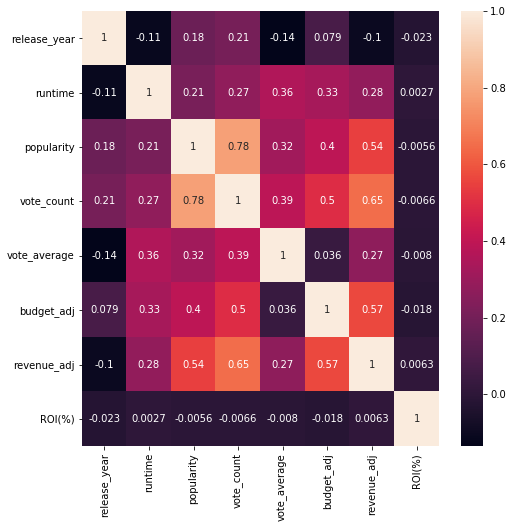

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(movie.corr(), annot=True);

In [49]:
exp = movie[['popularity', 'vote_average', 'revenue_adj', 'ROI(%)']]
exp.head(3)

,popularity,vote_average,revenue_adj,ROI(%)
0,32.985763,6.5,1392445892,1009
1,28.419936,7.1,348161292,252
2,13.112507,6.3,271619025,268


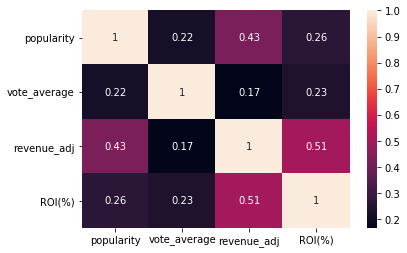

In [50]:
sns.heatmap(exp.corr(method='kendall'), annot=True);

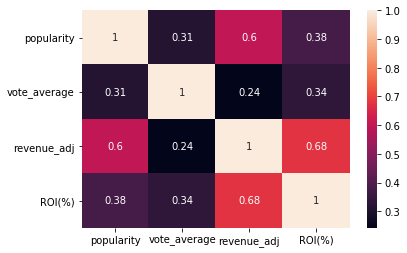

In [51]:
sns.heatmap(exp.corr(method='spearman'), annot=True);

> as seen above from the heatmap created from the dataframes (exclusing rows with value '0' in revenue and budget columns) that there is a correlation between 'Budget' and 'Revenue', a correlation between ''Popularity'' and ''Revenue'' (measured with spearman's rho and Kendall's Tau as popularity columns values are ordinal), and  also a stronger  correlation between  ''Vote count'' and ''Revenue''

### Research Question 2  (Do seasons differ in movie production?)

In [53]:
mov_genre_seas = movie.groupby(['season',
                                      'main_genre'], as_index = False)['original_title'].count().sort_values( 'original_title',
                                                                                                             ascending=False)

most_gen_season = mov_genre_seas.groupby('season').head(1)
most_gen_season

,season,main_genre,original_title
6,Fall,Drama,333
61,Winter,Drama,228
40,Summer,Comedy,213
21,Spring,Comedy,166


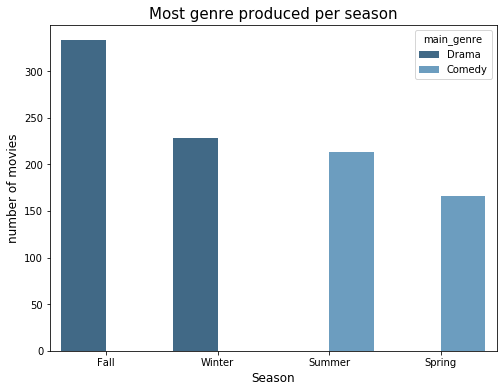

In [205]:
plt.figure(figsize=(8,6))
sns.barplot(x='season', y='original_title', hue='main_genre', data=most_gen_season, palette="Blues_d")
plt.xlabel('Season', fontsize=12)
plt.ylabel('number of movies', fontsize=12)
plt.title('Most genre produced per season', fontsize=15);

> as shown above; in Fall and Winter Drama is the most produced genre while in Summer and Spring Comedy is the most produced genre

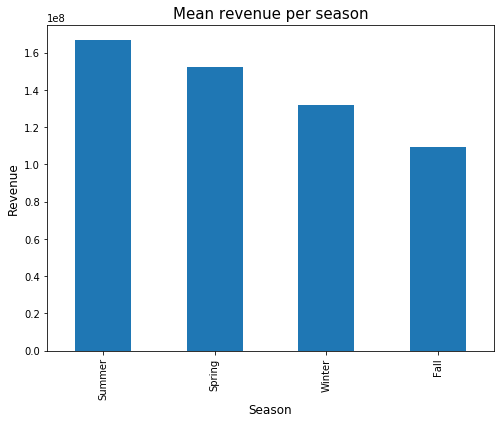

In [119]:
plt.figure(figsize=(8,6))
movie.groupby('season')['revenue_adj'].mean().sort_values(ascending=False).plot(kind='bar');
plt.ylabel('Revenue', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.title('Mean revenue per season', fontsize=15);

> as shown above, on average Summer yields the most revenue in the movie industry followed by Spring and Winter

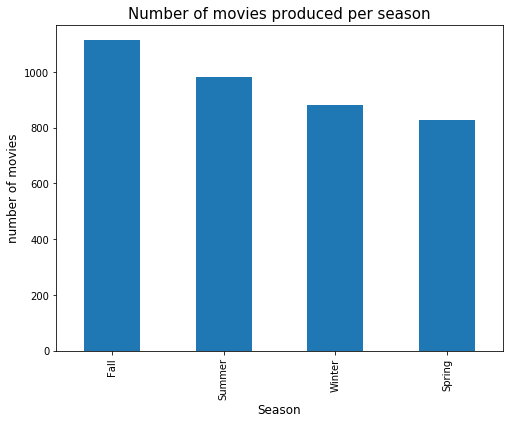

In [54]:
plt.figure(figsize=(8,6))
movie.groupby(['season'])['original_title'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('number of movies', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.title('Number of movies produced per season', fontsize=15);

> as shown above, the most number movies are produced in Fall followed by Summer and Winter

### Research Question 3  (How do eras differ in movie production?)

In [229]:
mov_genre_era = movie.groupby(['era',
                                      'main_genre'], as_index = False)['original_title'].count().sort_values('original_title',
                                                                                                             ascending=False)

most_gen_era = mov_genre_era.groupby('era').head(1)
most_gen_era

,era,main_genre,original_title
6,00s,Drama,333
24,10s,Drama,258
86,90s,Drama,171
66,80s,Comedy,77
54,70s,Drama,35
40,60s,Drama,16


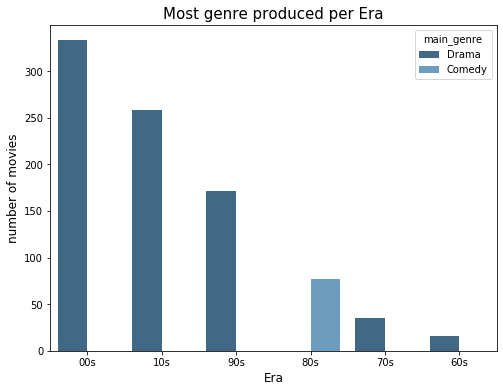

In [223]:
plt.figure(figsize=(8,6))
sns.barplot(x='era', y='original_title', hue='main_genre', data=most_gen_era, palette="Blues_d")
plt.xlabel('Era', fontsize=12)
plt.ylabel('number of movies', fontsize=12)
plt.title('Most genre produced per Era', fontsize=15);

> as shown above, seems like drama has always been predominate in almost every era except the 80's which has shown more interest in comedy

In [55]:
mov_pop_era = movie.groupby(['era',
                            'main_genre'], as_index = False)['popularity'].mean().sort_values('popularity',
                                                                                                             ascending=False)

most_pop_era = mov_pop_era.groupby('era').head(1)
most_pop_era

,era,main_genre,popularity
35,10s,Western,3.456132
46,60s,Science Fiction,3.309196
55,70s,Family,2.430667
82,90s,Animation,1.965482
8,00s,Fantasy,1.911929
65,80s,Animation,1.522389


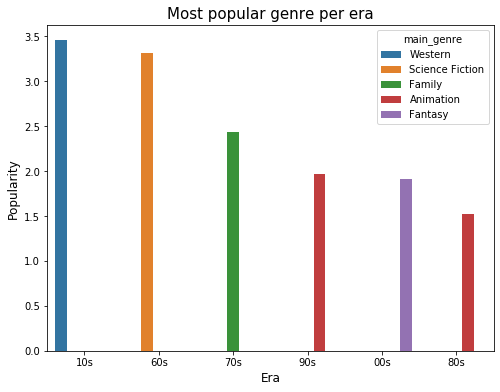

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(x='era', y='popularity', hue='main_genre', data=most_pop_era)
plt.xlabel('Era', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Most popular genre per era', fontsize=15);

> as shown above, most popular genre in 2010+ years was Western and surprisingly the most popular genre in the 60's was Science Fiction

In [58]:
mov_rev_era = movie.groupby(['era',
                            'main_genre'], as_index = False)['revenue_adj'].mean().sort_values('revenue_adj',
                                                                                                             ascending=False)

most_rev_era = mov_rev_era.groupby('era').head(1)
most_rev_era

,era,main_genre,revenue_adj
41,60s,Family,1.345551e+09
59,70s,Music,6.077490e+08
87,90s,Family,3.954046e+08
20,10s,Animation,3.416755e+08
1,00s,Adventure,3.068947e+08
64,80s,Adventure,2.486986e+08


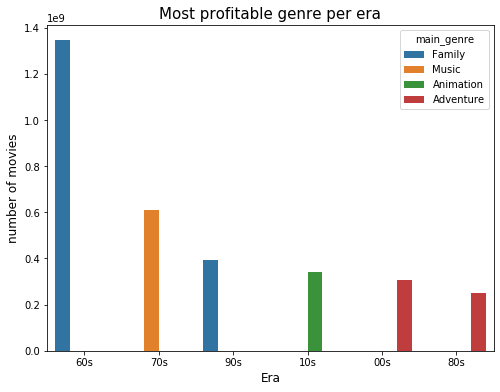

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(x='era', y='revenue_adj', hue='main_genre', data=most_rev_era)
plt.xlabel('Era', fontsize=12)
plt.ylabel('number of movies', fontsize=12)
plt.title('Most profitable genre per era', fontsize=15);

> as shown above, the most profitable genre per era, the 60's and 90's have seen a rise of revenue towards family genre
while the 80's and 2000's profited more from adevnture genres and finally , in the 2010's the most profitable genre was Animation

### Research Question 4  (How do genres differ throughout the years?)

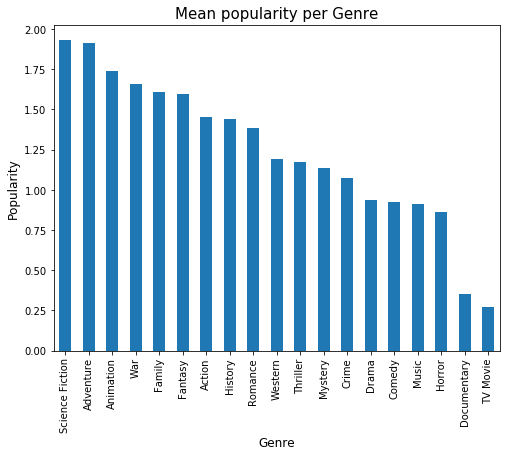

In [61]:
plt.figure(figsize=(8,6))
movie.groupby('main_genre')['popularity'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Mean popularity per Genre', fontsize=15);

> as shown above, On average throughout the years Science Fiction has always been the most popular genre followed by Adventure and Animation While Documentries are almost the least popular

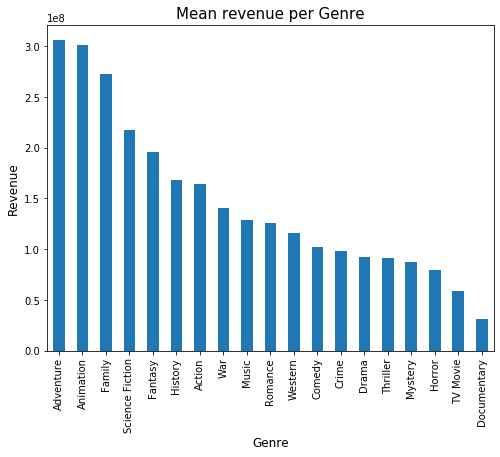

In [60]:
plt.figure(figsize=(8,6))
movie.groupby('main_genre')['revenue_adj'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Mean revenue per Genre', fontsize=15);

>as shown above, throughout the years Adventure movies has seen the most revenue on average followed by Animation movies

### Research Question 5  (Who are the most popular directors and talents per era?)

In [66]:
succ_dir_era = movie.groupby(['era', 
               'director'], as_index=False)['popularity'].mean().sort_values(by=['era',
                                                                                 'popularity'], ascending=False).groupby('era').head(1)
succ_dir_era

,era,director,popularity
2244,90s,Lilly Wachowski|Lana Wachowski,7.753899
1928,80s,Richard Marquand,4.828854
1721,70s,Ridley Scott,4.935897
1612,60s,Guy Hamilton,3.153791
974,10s,Colin Trevorrow,16.696886
592,00s,Patrick Tatopoulos,5.806897


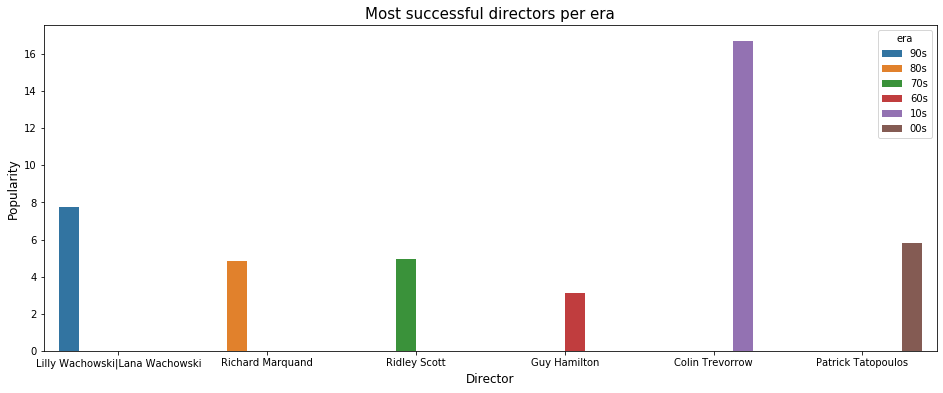

In [67]:
plt.figure(figsize=(16,6))
sns.barplot(data=succ_dir_era, x='director', y='popularity', hue='era')
plt.xlabel('Director', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Most successful directors per era', fontsize=15);

> as seen above, Patrick tatopulos directed the most popular movie in the 2000's while Colin Trevorrow did the 2010's

In [269]:
succ_tal_era = movie.groupby(['era', 
               'lead_talent'], as_index=False)['popularity'].mean().sort_values(by=['era',
                                                                                 'popularity'], ascending=False).groupby('era').head(1)
succ_tal_era

,era,lead_talent,popularity
1668,90s,Edward Norton,5.140455
1479,80s,Mark Hamill,5.158648
1290,70s,Mark Hamill,12.037933
1210,60s,Keir Dullea,3.309196
740,10s,Chris Pratt,23.648484
547,00s,Sam Worthington,9.432768


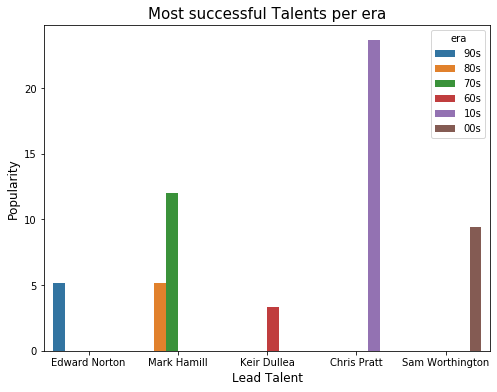

In [270]:
plt.figure(figsize=(8,6))
sns.barplot(data=succ_tal_era, x='lead_talent', y='popularity', hue='era')
plt.xlabel('Lead Talent', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Most successful Talents per era', fontsize=15);

>as shown above, Mark hamill starred in the most popular movies in both the 70's and 80's while chris pratt did the 2010's

<a id='conclusions'></a>
## Conclusions

#### Conclusions per question were written underneath each graph, However, additional insights will be shared in this section

> popularity is highly correlated (60%-65%) with revenue using pearson and spearman correlation methods
which is to be expected. Generally speaking, the more popular the movie the more sales and hence,  the more revenue

>While the most amount of movies are produced in the Fall , they record the lowest revenue.
In contrast, while the least amount of movies are produced in the spring , they record second highest revenue.
**Looks like a classic case of Quantity vs Quality**

>While Drama and Comedy were usually the most genre of movies produced in every era, counter intuitively, they were **neither** the most popular **nor** most profitable per era

>While Science Fiction has been the most popular genre throughout the years , it is **not** the most profitable